# CREATION OF SEVERAL BASELINE MODELS

In this notebook, we will focus on create several baseline models to confront them after with Machine Learning models:
- **Random winner** : we select a random horse and we compare it to the actual winner
- **Winner on the win_odds** : we select the horse with the minimum win_odds and we compare it to the actual winner
- **Winner on the Draw place** : we select an horse according to his draw position and we compare it to the actual winner 


- **Random list of placed horses**: we select a random list of horses and check if they were really placed (1st, 2nd or 3th)
- **List of place horses according to their place_odds** : we select a list of horse according to thier minimum place_odds (if don't exist, we take the win_odds
- **Placed on the Draw place** : we select a list of horses according to theirs draw position and we compare it to the real placed list 




# Prerequisite

In [1]:
#%cd mvp-horse-racing-prediction/

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import math

sns.set_style('darkgrid')

## Import data

All the data came from kaggle : https://www.kaggle.com/gdaley/hkracing

You can check the data description there.

However, we only use the test set created from previous notebooks

In [3]:
df_test = pd.read_csv('../data/test_runners.csv')

In [4]:
print(f'There are {df_test.race_id.nunique()} races in this dataset')

There are 471 races in this dataset


For the purpose of create baseline model, we only gonna focus on several columns which are col_to_keep

In [5]:
col_to_keep = ['race_id','horse_no', 'won', 'place', 'draw', 'place_odds', 'win_odds']

df = df_test[col_to_keep]
df.head(14)

,race_id,horse_no,won,place,draw,place_odds,win_odds
0,5878,14.0,0,0,11.0,3.3,11.0
1,5878,13.0,0,0,6.0,6.0,25.0
2,5878,2.0,0,0,4.0,1.6,4.6
3,5878,6.0,0,0,9.0,24.0,99.0
4,5878,10.0,0,1,5.0,2.2,6.4
5,5878,11.0,0,1,1.0,2.8,7.7
6,5878,9.0,1,1,3.0,7.8,17.0
7,5878,8.0,0,0,14.0,4.8,15.0
8,5878,3.0,0,0,10.0,2.2,6.6
9,5878,12.0,0,0,8.0,3.3,9.9


We can see that for each race, we have the horse number, to identify them for each race.

In [6]:
df[df.horse_no.isna()]

,race_id,horse_no,won,place,draw,place_odds,win_odds
2883,6108,NaN,0,0,NaN,NaN,NaN


We drop the line 2883 because we have a lot of NaN values

In [7]:
df = df.drop([2883],axis = 0)

We create a pivot table in which all line correspond to a race. And all information about all runners are mentionned in a row.

In [8]:
df_pivot = df.pivot(index='race_id',columns='horse_no').reset_index()
df_pivot.head()

race_id  won                                          ... win_odds  \
horse_no          1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  ...      5.0   
0           5878  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...     55.0   
1           5879  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN  ...     11.0   
2           5880  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...      2.6   
3           5881  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     99.0   
4           5882  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     16.0   

                                                                
horse_no   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0  14.0  
0         99.0  10.0  15.0  17.0   6.4   7.7   9.9  25.0  11.0  
1          2.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2          7.7  17.0  11.0  77.0  17.0   9.0  27.0  29.0  65.0  
3         12.0   9.6  11.0  15.0   7.7  49.0   3.5   NaN   NaN  
4         15.0  13.0  99.0  37.0   8.8  53.0  39.0   NaN   NaN  

[5 rows x 71 columns]

We define some functions to know the number of horse in the race

We can also know if a horse was not present for at the beginning of the race 

In [9]:

def hm_horses(df, race_id):
    "Return the number of horse for a specific race_id"
    Z = df[df['race_id']==race_id]['won']
    return len(Z.columns[(Z.isna() == False).iloc[0]])


def horse_no_on_the_line(df,race_id):
    "return horses number for all horse ready on the departure line"
    Z = df[df['race_id']==race_id]['won']
    return Z.columns[(Z.isna() == False).iloc[0]].to_list()

In [10]:
#Let's see how works both previous function with the number of horses by race 
df_pivot = df_pivot

race_id = df.race_id.loc[3]
print(f"How many horses for the race number {race_id} : {hm_horses(df_pivot, race_id)}")
print(f"Horses number on the depart line for race {race_id} : {horse_no_on_the_line(df_pivot,race_id)}")


race_id = df.race_id.loc[16]
print(f"How many horses for the race number {race_id} : {hm_horses(df_pivot, race_id)}")
print(f"Horses number on the depart line for race {race_id} : {horse_no_on_the_line(df_pivot,race_id)}")

How many horses for the race number 5878 : 14
Horses number on the depart line for race 5878 : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]
How many horses for the race number 5879 : 6
Horses number on the depart line for race 5879 : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [11]:
df_pivot.head()

race_id  won                                          ... win_odds  \
horse_no          1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  ...      5.0   
0           5878  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...     55.0   
1           5879  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN  ...     11.0   
2           5880  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...      2.6   
3           5881  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     99.0   
4           5882  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     16.0   

                                                                
horse_no   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0  14.0  
0         99.0  10.0  15.0  17.0   6.4   7.7   9.9  25.0  11.0  
1          2.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2          7.7  17.0  11.0  77.0  17.0   9.0  27.0  29.0  65.0  
3         12.0   9.6  11.0  15.0   7.7  49.0   3.5   NaN   NaN  
4         15.0  13.0  99.0  37.0   8.8  53.0  39.0   NaN   NaN  

[5 rows x 71 columns]

We know have our final table. 
Let's have a look of some informations about it.

In [12]:
print(f"The lenght of the final table is {len(df_pivot)}")

The lenght of the final table is 470


In [13]:
print(f"There are only races with this numbers of horses : {set(df.race_id.value_counts().to_list())}")

There are only races with this numbers of horses : {6, 7, 8, 9, 10, 11, 12, 13, 14}


In [14]:
#take 15 secondes
#We create a list of 11 sub_lists and we put race_id in thoses list according to the number of horse on the departure line
race_id_by_hm_horses = [[] for _ in range(4,15)]

for race_id in df_pivot.race_id.unique():
    hm = hm_horses(df_pivot, race_id)
    race_id_by_hm_horses[hm - 4].append(race_id)

        

In [15]:
hm_races_by_hm_horses = [len(val) for val in race_id_by_hm_horses]

print(f"This is the list with how many race where run with 4 to 14 horses : {hm_races_by_hm_horses}")
print(f"For example, we only have {hm_races_by_hm_horses[1]} races with 5 horses but we have {hm_races_by_hm_horses[8]} races with 12 horses")

This is the list with how many race where run with 4 to 14 horses : [0, 0, 1, 4, 3, 8, 22, 37, 194, 22, 179]
For example, we only have 0 races with 5 horses but we have 194 races with 12 horses


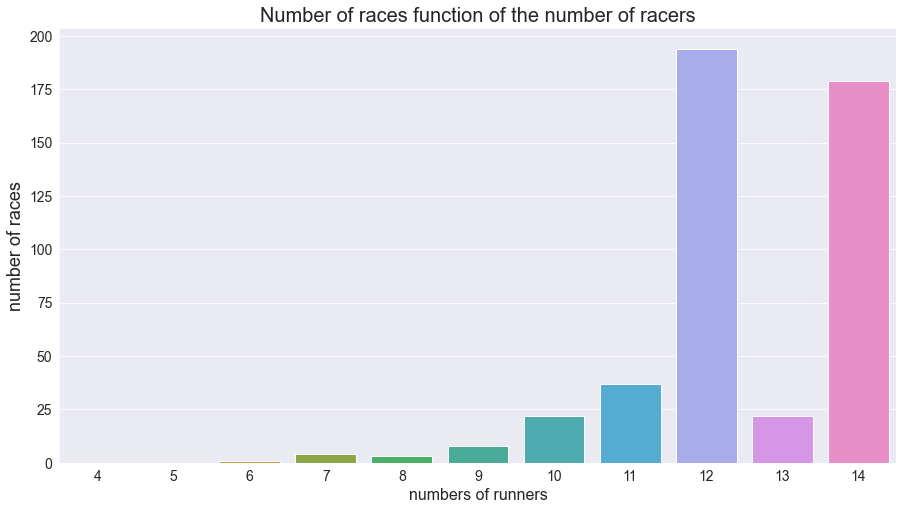

In [16]:
x = [str(i) for i in range(4,15)]
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x, hm_races_by_hm_horses, order = x,ax=ax)
plt.title("Number of races function of the number of racers", fontsize = 20)
plt.ylabel('number of races', fontsize=18)
plt.xlabel('numbers of runners', fontsize=16)
plt.tick_params(labelsize=14)
#plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

## Baseline Models for winner prediction

In [17]:


def get_winner(df, race_id):
    "This function returns the actual winner of the race_id"
    "it's an integer which is the horse_no"
    Z = df[df['race_id']==race_id]['won']==1
    return Z.columns[(Z == True).iloc[0]][0]


def get_winner_win_odds(df, race_id):
    "This functions returns the horse_no which is the favorite meaning his winning_odds is the lowest"
    Z = df[df['race_id']==race_id]['win_odds']
    sorted_list = sorted(df[df['race_id']==race_id]['win_odds'].iloc[0].to_list()) #on range la list dans l'ordre croissant des valeurs afin de selectionner la plus petite valeur de win_odds.
    S =[x for x in sorted_list if math.isnan(x) == False]
    return Z.columns[(Z == S[0]).iloc[0]][0]
    

def get_winner_draw(df, race_id, draw_place):
    "Renvoi le cheval qui est placé en position draw_place de la corde"
    "Un cheval proche de la corde aura des chances de victoire accrue"
    Z = df[df['race_id']==race_id]['draw']
    sorted_list = sorted(df[df['race_id']==race_id]['draw'].iloc[0].to_list())
    S =[x for x in sorted_list if math.isnan(x) == False]
    return Z.columns[(Z == S[draw_place-1]).iloc[0]][0] #si jamais pas de valeur correspondante, on prendre ceux en fonction de la plus proche de la corde

def get_random_win(df, race_id):
    "renvoi un cheval aléatoire pamri ceux qui ont pris le depart de la race_id"
    "we use a random seed with the number of the race in order to always have the same results"
    random.seed(race_id+1)
    return random.sample(horse_no_on_the_line(df,race_id), 1)[0]

def compute_df(pred,real):
    "return a dataframe with information to draw the evolution graph"
    Z = pd.DataFrame(list(zip(pred,real)), columns=['pred','real'])
    Z['win_odds'] = [get_win_odds(df_pivot,match_race_id_from_indices[indice],real_winner[indice]) for indice in range(470)]
    Z['profit'] = np.where(Z['pred']== Z['real'], Z['win_odds']-1, -1)
    Z['cumul'] = Z['profit'].cumsum()
    Z['cumul_100'] = Z['cumul'] + 100
    return Z


def draw_evolution(df,model_name):
    "draw the evolution graph"
    plt.figure(figsize=(10,10)).suptitle(f'Evolution of the profit with $100 for {model_name}', fontsize=20)
    plt.ylabel('profit ($)', fontsize=20)
    plt.xlabel('number of races', fontsize=20)
    plt.xticks(rotation=0,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    plt.plot(df.index, df.cumul_100)
    


In [18]:
# How works previous functions
#try it with 1 and 1412
race_id = df.race_id.loc[3]
draw_place = 2
num = 3
df_pivot = df_pivot

print(f"Number of the winning horse for race number {race_id} : {get_winner(df_pivot, race_id)}")
print(f"A random winning horse for race number {race_id} : {get_random_win(df_pivot, race_id)}")
print(f"Number of the favorite horse for winning the race number {race_id} : {get_winner_win_odds(df_pivot, race_id)}")
print(f"Number of the horse which the draw place is {draw_place} for race number {race_id} : {get_winner_draw(df_pivot, race_id, draw_place)}")

Number of the winning horse for race number 5878 : 9.0
A random winning horse for race number 5878 : 5.0
Number of the favorite horse for winning the race number 5878 : 2.0
Number of the horse which the draw place is 2 for race number 5878 : 5.0


In [19]:
#There is a line beak in race_id and we also drop some race/rows.
#We create this list with all race_id and this will alow us to match indice of the list with the actual race_id
match_race_id_from_indices = df_pivot.race_id.to_list()

# Winner prediction

### List of Real Winner

In [20]:
#take 15 sec 
real_winner = np.array([get_winner(df_pivot, race_id) for race_id in df_pivot.race_id])
real_winner[:3]

array([9., 6., 8.])

We gonna compare all different baseline model according to several criterias and among them, we will calculate the potential benefice if some bet were well find. 
We pay 1 euros for each bet and if our bet is actually the real value, we win the odds for which we bet. 


For example:
- I bet on horse_no = 3 and the winner is horse_no = 5 --> I lose 1 euros 
- I bet on horse_no = 3 and the winner is horse_no = 3 --> I win win_odds euros corresponding to the horse_no I choose



In [21]:
def get_win_odds(df,race_id,horse_no):
    "Return the win_odds for a race_id and a horse_no"
    return df[df['race_id']==race_id]['win_odds'].iloc[0][horse_no]

# Random winner prediciton

In this section, we will focus on the random winner prediction baseline.
This model guess randomly a horse_no and we gonna see if he win the race to check if we win some money.

In [22]:
random_prediction = np.array([get_random_win(df_pivot, race_id) for race_id in df_pivot.race_id])

In [23]:
#with is_same we check if the real winner correspond to our predictions
is_same = (random_prediction == real_winner)
#we retrieve list indices from is_same where we guess the horse right meaning we won the bet
indices = np.where( is_same == True)

In [24]:
#We compute the total revenu for all bet we did
#If we won the bet we add the win_odds for the race and the horse to our revenu

revenu = 0.0
for indice in indices[0]:
    revenu = revenu + get_win_odds(df_pivot,match_race_id_from_indices[indice],real_winner[indice])
    
# We use match_race_id_from_indices[indice] to retrive the race_id from the list indice

In [25]:
print(f"How many bet we win: {is_same.sum()}")
print(f"Total revenu, the sum of the win_odds : {revenu}")
print(f"how many bet we did : {len(df_pivot)}")  
print(f"The rate of winning bet : {is_same.sum()/len(df_pivot)}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - len(df_pivot)}")  

How many bet we win: 34
Total revenu, the sum of the win_odds : 266.4
how many bet we did : 470
The rate of winning bet : 0.07234042553191489
The total profit with a 1 euro bet by horse : -203.60000000000002


In [26]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
random_winner_SM = ['random_winner',len(df_pivot),revenu,revenu - len(df_pivot),is_same.sum(), is_same.sum()/len(df_pivot), len(df_pivot)]

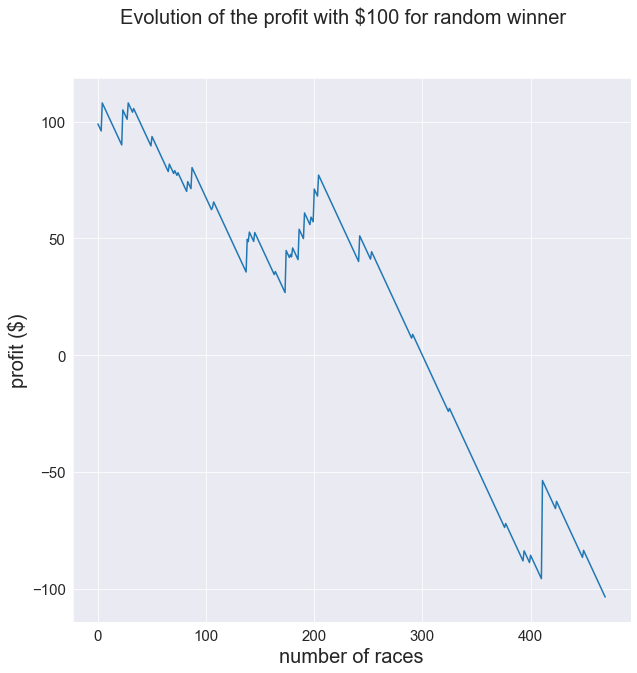

In [27]:
draw_evolution(compute_df(random_prediction,real_winner),model_name = 'random winner')

# Winner prediction on the win_odds

In this section, we will focus on the favorite winner prediciton baseline.
This model take the favorite horse, meaning the one with the lowest win_odds and we gonna check if he is the real winner.

In [28]:
win_odds_prediction = np.array([get_winner_win_odds(df_pivot, race_id) for race_id in df_pivot.race_id])

In [29]:
#with is_same we check if the real winner correspond to our predictions
is_same = (win_odds_prediction == real_winner)
#we retrieve list indices from is_same where we guess the horse right meaning we won the bet
indices = np.where( is_same == True)

In [30]:
#We compute the total revenu for all bet we did
#If we won the bet we add the win_odds for the race and the horse to our revenu

revenu = 0.0
for indice in indices[0]:
    revenu = revenu + get_win_odds(df_pivot,match_race_id_from_indices[indice],real_winner[indice])
    
# We use match_race_id_from_indices[indice] to retrive the race_id from the list indice

In [31]:
print(f"How many bet we win: {is_same.sum()}")
print(f"Total revenu, the sum of the win_odds : {revenu}")
print(f"how many bet we did : {len(df_pivot)}")  
print(f"The rate of winning bet : {is_same.sum()/len(df_pivot)}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - len(df_pivot)}")  

How many bet we win: 136
Total revenu, the sum of the win_odds : 408.2999999999999
how many bet we did : 470
The rate of winning bet : 0.28936170212765955
The total profit with a 1 euro bet by horse : -61.7000000000001


In [32]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
favorite_winner_SM = ['favorite_winner',len(df_pivot),revenu,revenu - len(df_pivot),is_same.sum(), is_same.sum()/len(df_pivot), len(df_pivot)]

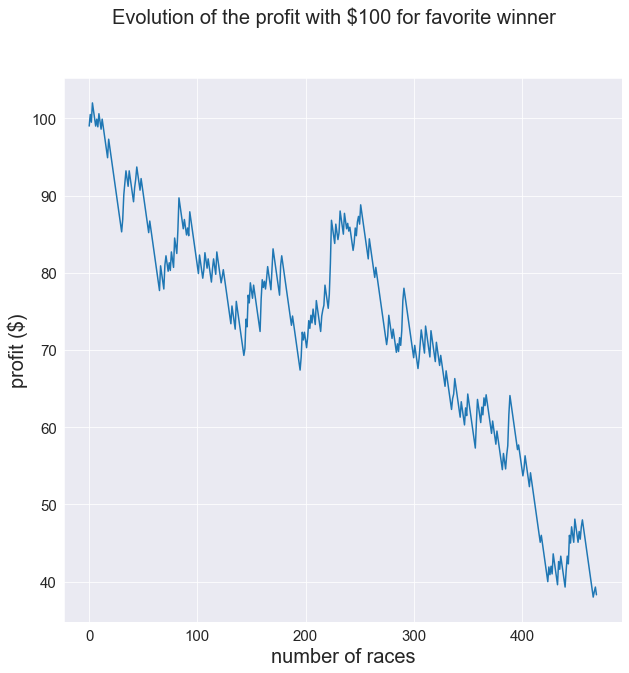

In [33]:
draw_evolution(compute_df(win_odds_prediction,real_winner),model_name = 'favorite winner')

# Winner prediction on the draw place

In this section, we will focus on the draw place winner prediciton baseline.

This model take the second horse from the center of the field, meaning the one with the draw_place at 2 (it can be 3 if the horse with the draw place at 2 is not here ) and we gonna see if he is doing a great job.

In [34]:
draw_place = 2
win_draw_prediction = np.array([get_winner_draw(df_pivot, race_id, draw_place) for race_id in df_pivot.race_id])

In [35]:
#with is_same we check if the real winner correspond to our predictions
is_same = (win_draw_prediction == real_winner)
#we retrieve list indices from is_same where we guess the horse right meaning we won the bet
indices = np.where( is_same == True)

In [36]:
#We compute the total revenu for all bet we did
#If we won the bet we add the win_odds for the race and the horse to our revenu

revenu = 0.0
for indice in indices[0]:
    revenu = revenu + get_win_odds(df_pivot,match_race_id_from_indices[indice],real_winner[indice])
    
# We use match_race_id_from_indices[indice] to retrive the race_id from the list indice

In [37]:
print(f"How many bet we win: {is_same.sum()}")
print(f"Total revenu, the sum of the win_odds : {revenu}")
print(f"how many bet we did : {len(df_pivot)}")  
print(f"The rate of winning bet : {is_same.sum()/len(df_pivot)}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - len(df_pivot)}")  

How many bet we win: 39
Total revenu, the sum of the win_odds : 268.0
how many bet we did : 470
The rate of winning bet : 0.08297872340425531
The total profit with a 1 euro bet by horse : -202.0


In [38]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
draw_winner_SM = ['draw_winner',len(df_pivot),revenu,revenu - len(df_pivot),is_same.sum(), is_same.sum()/len(df_pivot), len(df_pivot)]

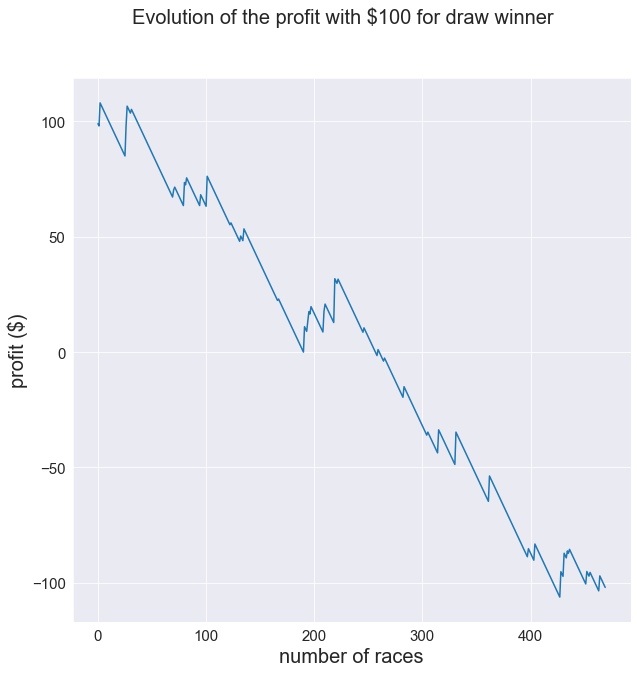

In [39]:
draw_evolution(compute_df(win_draw_prediction,real_winner), model_name = 'draw winner')

# Placed horse prediction

To enter this section, we need some prerequisites. 

We saw that we can bet on the winner but we can also bet on placed horse in a race. For a race with more than 7 horses, we have 3 differents horses placed. For a race with less than 7, we only have 2 horses placed.

For each race, we gona bet 1 euro for each placed horses we bet on.
In this case if we win we will win the place_odds instead of the win_odds. Place_odds is obviously lower than the win_odds cause it is harder to guess the winner than a placed horse.

For example : 
- if a race had 14 horses, i gonna bet on 3 differents horses and spent 3 euros. For each horses placed which i guesses right, i gonna win the place_odds for this horse_no.
- if I get two horses rigth, i will win the sum of both their place_odds.

In [40]:
#Function used to determine if we gonna have 2 or 3 placed horses in this race according to the number of horses at the beginning

def hm_placed_horses(df_pivot, race_id):
    "Return 3 or 2 if we have more or less than 7 horses on the race"
    hm = hm_horses(df_pivot, race_id)
    if hm >= 7:
        return 3
    else:
        return 2

In [41]:
#An example of the previous funciton
print(f"how many placed horses for a race with 6 horses in the race : {hm_placed_horses(df_pivot, df.race_id.loc[16])}")
print(f"how many placed horses for a race with 14 horses in the race : {hm_placed_horses(df_pivot, df.race_id.loc[3])}")

how many placed horses for a race with 6 horses in the race : 2
how many placed horses for a race with 14 horses in the race : 3


In [42]:
def hm_nan_place_odds(df, race_id):
    "return for a race_id the number of nan value for the column place_odds"
    return sum(df_pivot[df_pivot['race_id']==race_id]['place_odds'].isna().sum().to_list())


def compare_place_odds_nan_with_hm_horses(df,race_id):
    "This function compare if the number of nan value for place_odds is equal to the number of missing horse at the beginning of the race"
    "If both number are equal we can keep the row by returning True, otherwize, we discard it with a False"
    if hm_horses(df_pivot, race_id) == 14 - hm_nan_place_odds(df, race_id):
        return True
    else:
        return False

In [43]:
#This cell explains how work both of the previous functions 

race_id = df.race_id.loc[3]

print(f"There is {hm_nan_place_odds(df_pivot, race_id)} nan value in the race_id {race_id} for the place_odds.")
print(f"Do we keep this race in our final table : {compare_place_odds_nan_with_hm_horses(df_pivot,race_id)}")

race_id = df.race_id.loc[16]

print(f"There is {hm_nan_place_odds(df_pivot, race_id)} nan value in the race_id {race_id} for the place_odds.")
print(f"Do we keep this race in our final table : {compare_place_odds_nan_with_hm_horses(df_pivot,race_id)}")

There is 0 nan value in the race_id 5878 for the place_odds.
Do we keep this race in our final table : True
There is 8 nan value in the race_id 5879 for the place_odds.
Do we keep this race in our final table : True


In [44]:
#this is a list of rows that must be discarded because place_odds values are missing
#take 20 sec
discarded_rows = [race_id for race_id in df_pivot.race_id if compare_place_odds_nan_with_hm_horses(df_pivot,race_id) == False]
discarded_rows[:3]

[5973, 6129, 6130]

In [45]:
#we keep only row that are not in the list discarded_rows
df_pivot = df_pivot[~df_pivot['race_id'].isin(discarded_rows)]

In [46]:
match_race_id_from_indices = df_pivot.race_id.to_list()

In [527]:
df_pivot.shape

(249, 71)

## Baseline Models for placed prediction

In [528]:
def get_place(df,race_id, num):
    "Return a list with num horse if they are placed 1st, 2nd, and 3th"
    "Do not respect the order"
    Z = df[df['race_id']==race_id]['place']
    return Z.columns[(Z == True).iloc[0]].to_list()[:num] #on s'assure de ne prendre que 3 valeurs si jamais plusieurs chevaux ont la même côte
    
def get_place_place_odds(df, race_id, num):
    "Return a list of num horses which are favorties to get placed"
    "Thoses horses are selected because the have the lowest place_odds"
    Z = df[df['race_id']==race_id]['place_odds']
    sorted_list = sorted(df[df['race_id']==race_id]['place_odds'].iloc[0].to_list()) #on range la list dans l'ordre croissant des valeurs afin de selectionner la plus petite valeur de win_odds.
    S =[x for x in sorted_list if math.isnan(x) == False]
    return Z.columns[(Z.isin(S[:num])).iloc[0]].to_list()[:num] #on s'assure de ne prendre que num valeurs si jamais plusieurs chevaux ont la même côte

def get_random_place(df, race_id, num):
    "Return a random list of num horses"
    "We use a seed to have always the same random prediction"
    random.seed(race_id)
    return random.sample(horse_no_on_the_line(df,race_id), num)



def list_to_odds(x):
    'return the amount of money we win according to prediction, real values and place_odds'
    tot = 0
    list_pred = x.pred
    list_real = x.real
    place_odds_real = x.place_odds_real
    for i in range(len(list_real)):
        if list_real[i] in list_pred:
            tot = tot + place_odds_real[i] - 1
        else:
            tot = tot - 1
    return tot

def compute_df_placed(pred,real):
    'return a df with information to draw the evolution of our investement'
    L = []
    for i in range(len(real)):
        L.append([get_place_odds(df_pivot,match_race_id_from_indices[i],real[i][j]) for j in range(len(real[i]))])

    Z = pd.DataFrame(list(zip(pred,real)), columns=['pred','real'])   
    Z['place_odds_real'] = L
    Z['profit'] = Z.apply(list_to_odds,axis=1)
    Z['cumul'] = Z['profit'].cumsum()
    Z['cumul_100'] = Z['cumul'] + 100
    return Z



In [529]:
def get_place_draw(df, race_id, num):
    "Return a list of horse closest to the draw"
    "Meaning with the lower draw_place"
    Z = df[df['race_id']==race_id]['draw']
    sorted_list = sorted(df[df['race_id']==race_id]['draw'].iloc[0].to_list())
    S =[x for x in sorted_list if math.isnan(x) == False]
    return Z.columns[(Z.isin(S[:num])).iloc[0]].to_list() #si jamais pas de valeur correspondante, on prendre ceux en fonction de la plus proche de la corde

In [530]:
#get_place_draw(df_pivot, 0, 3)

In [531]:
df[df['race_id']==0]

,race_id,horse_no,won,place,draw,place_odds,win_odds


## list of the real placed horses

In [532]:
real_placed = np.array([get_place(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])

<ipython-input-532-989b6ac0298c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  real_placed = np.array([get_place(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])


In [533]:
real_placed[:2]

array([list([9.0, 10.0, 11.0]), list([1.0, 5.0])], dtype=object)

Like previsously, we need to retrieve information of the place_odds to estimate our gain

In [534]:
def get_place_odds(df,race_id,horse_no):
    "Return the place_odds for a race_id and a horse_no"
    return df[df['race_id']==race_id]['place_odds'].iloc[0][horse_no]

# Random list of placed horse prediciton

In this section, we will focus on a random list of placed horses prediciton baseline.

This model take a list of random horse_no and we gonna see if he is doing a great job.

In [535]:
#take 25 sec
random_place_prediction = np.array([get_random_place(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])

<ipython-input-535-04832f8cdc81>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  random_place_prediction = np.array([get_random_place(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])


In [536]:
random_place_prediction[:2]

array([list([10.0, 9.0, 2.0]), list([3.0, 5.0])], dtype=object)

In [537]:
df_pivot.shape

(249, 71)

In [538]:
#This cell compare all horse_no we "predict" to the real placed horses
#it gives us the revenu, number of bet and how many success bet we had

total_bet = 0
sucess_bet = 0
revenu = 0 

for indice in range(len(real_placed)):
    for horse_no in random_place_prediction[indice]:
        if horse_no in real_placed[indice]:  #if the horse is in the prediction and the real placed list, we won the bet
            sucess_bet = sucess_bet + 1

            revenu = revenu + get_place_odds(df_pivot,match_race_id_from_indices[indice],horse_no)

        total_bet = total_bet + 1
    

In [539]:
df_pivot[df_pivot['race_id']==5973]

Empty DataFrame
Columns: [(race_id, ), (won, 1.0), (won, 2.0), (won, 3.0), (won, 4.0), (won, 5.0), (won, 6.0), (won, 7.0), (won, 8.0), (won, 9.0), (won, 10.0), (won, 11.0), (won, 12.0), (won, 13.0), (won, 14.0), (place, 1.0), (place, 2.0), (place, 3.0), (place, 4.0), (place, 5.0), (place, 6.0), (place, 7.0), (place, 8.0), (place, 9.0), (place, 10.0), (place, 11.0), (place, 12.0), (place, 13.0), (place, 14.0), (draw, 1.0), (draw, 2.0), (draw, 3.0), (draw, 4.0), (draw, 5.0), (draw, 6.0), (draw, 7.0), (draw, 8.0), (draw, 9.0), (draw, 10.0), (draw, 11.0), (draw, 12.0), (draw, 13.0), (draw, 14.0), (place_odds, 1.0), (place_odds, 2.0), (place_odds, 3.0), (place_odds, 4.0), (place_odds, 5.0), (place_odds, 6.0), (place_odds, 7.0), (place_odds, 8.0), (place_odds, 9.0), (place_odds, 10.0), (place_odds, 11.0), (place_odds, 12.0), (place_odds, 13.0), (place_odds, 14.0), (win_odds, 1.0), (win_odds, 2.0), (win_odds, 3.0), (win_odds, 4.0), (win_odds, 5.0), (win_odds, 6.0), (win_odds, 7.0), (win_odds, 8.0), (win_odds, 9.0), (win_odds, 10.0), (win_odds, 11.0), (win_odds, 12.0), (win_odds, 13.0), (win_odds, 14.0)]
Index: []

[0 rows x 71 columns]

In [540]:
print(f"How many bet we win: {sucess_bet}")
print(f"how many races : {len(df_pivot)}")
print(f"how many bets : {total_bet}")
print(f"Total revenu, the sum of all the place_odds : {revenu}")
print(f"The rate of winning bet : {sucess_bet/total_bet}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - total_bet}")  

How many bet we win: 188
how many races : 249
how many bets : 746
Total revenu, the sum of all the place_odds : 593.3
The rate of winning bet : 0.2520107238605898
The total profit with a 1 euro bet by horse : -152.70000000000005


In [541]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
random_placed_SM = ['random_placed',total_bet,revenu,revenu - total_bet, sucess_bet, sucess_bet/total_bet, total_bet]

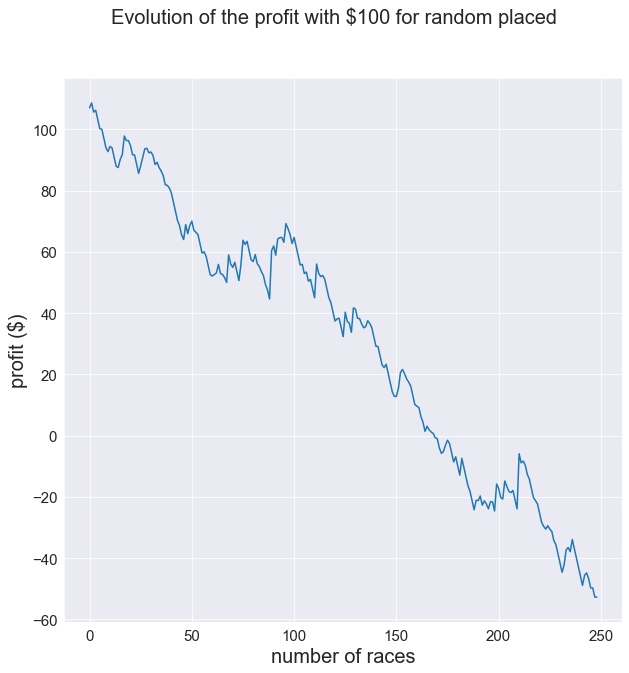

In [542]:
draw_evolution(compute_df_placed(random_place_prediction,real_placed),model_name='random placed')

# prediction on the place according to the place odds

In [543]:
odds_place_prediction = np.array([get_place_place_odds(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])

<ipython-input-543-e562cdfcd496>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  odds_place_prediction = np.array([get_place_place_odds(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])


In [544]:
#This cell compare all horse_no we "predict" to the real placed horses
#it gives us the revenu, number of bet and how many success bet we had

total_bet = 0
sucess_bet = 0
revenu = 0 

for indice in range(len(real_placed)):
    for horse_no in odds_place_prediction[indice]:
        if horse_no in real_placed[indice]:  #if the horse is in the prediction and the real placed list, we won the bet
            sucess_bet = sucess_bet + 1
            revenu = revenu + get_place_odds(df_pivot,match_race_id_from_indices[indice],horse_no)

        total_bet = total_bet + 1
    

In [545]:
print(f"How many bet we win: {sucess_bet}")
print(f"how many races : {len(df_pivot)}")
print(f"how many bets : {total_bet}")
print(f"Total revenu, the sum of all the place_odds : {revenu}")
print(f"The rate of winning bet : {sucess_bet/total_bet}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - total_bet}")  

How many bet we win: 355
how many races : 249
how many bets : 746
Total revenu, the sum of all the place_odds : 594.5000000000005
The rate of winning bet : 0.47587131367292224
The total profit with a 1 euro bet by horse : -151.49999999999955


In [546]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
favorite_placed_SM = ['favorite_placed',total_bet,revenu,revenu - total_bet, sucess_bet, sucess_bet/total_bet, total_bet]

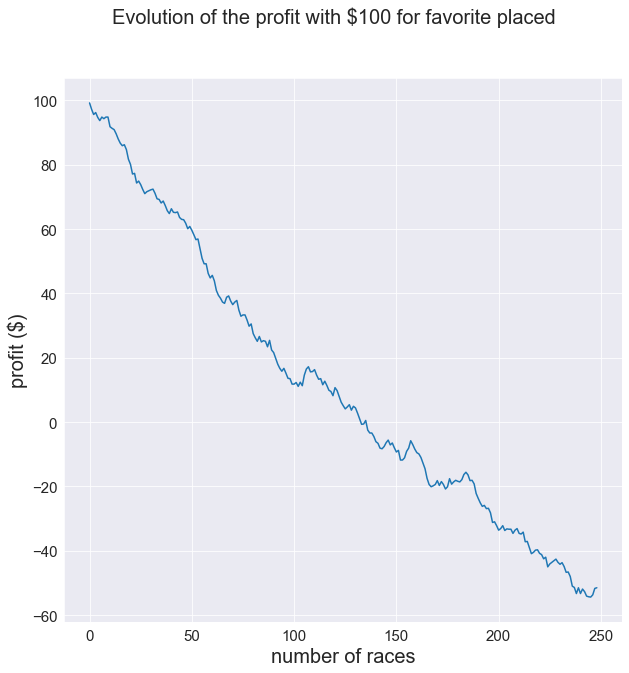

In [547]:
draw_evolution(compute_df_placed(odds_place_prediction,real_placed), model_name = 'favorite placed')

# prediction on the place according to the draw place

We gonna take the first horses with the lower draw_place

In [548]:
draw_place_prediction = np.array([get_place_draw(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])

<ipython-input-548-9eceb065b6f9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  draw_place_prediction = np.array([get_place_draw(df_pivot, race_id, hm_placed_horses(df_pivot, race_id)) for race_id in df_pivot.race_id])


In [549]:
#This cell compare all horse_no we "predict" to the real placed horses
#it gives us the revenu, number of bet and how many success bet we had

total_bet = 0
sucess_bet = 0
revenu = 0 

for indice in range(len(real_placed)):
    for horse_no in draw_place_prediction[indice]:
        if horse_no in real_placed[indice]:  #if the horse is in the prediction and the real placed list, we won the bet
            sucess_bet = sucess_bet + 1
            revenu = revenu + get_place_odds(df_pivot,match_race_id_from_indices[indice],horse_no)

        total_bet = total_bet + 1
    

In [550]:
print(f"How many bet we win: {sucess_bet}")
print(f"how many races : {len(df_pivot)}")
print(f"how many bets : {total_bet}")
print(f"Total revenu, the sum of all the place_odds : {revenu}")
print(f"The rate of winning bet : {sucess_bet/total_bet}")  
print(f"The total profit with a 1 euro bet by horse : {revenu - total_bet}")  

How many bet we win: 212
how many races : 249
how many bets : 746
Total revenu, the sum of all the place_odds : 571.3999999999999
The rate of winning bet : 0.28418230563002683
The total profit with a 1 euro bet by horse : -174.60000000000014


In [551]:
#Creation of a list for the Summary table
# columns order : columns=['Models', 'Investment', 'revenu','profit','winning_bet', 'winning_rate_bet', 'total_bet']
draw_placed_SM = ['draw_placed',total_bet,revenu,revenu - total_bet, sucess_bet, sucess_bet/total_bet, total_bet]

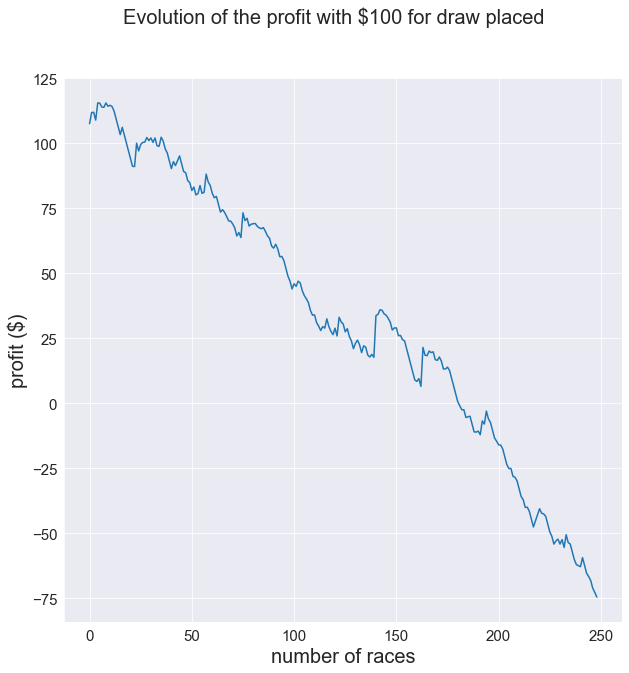

In [552]:
draw_evolution(compute_df_placed(draw_place_prediction,real_placed),model_name = 'draw placed')

# Summary table

In [553]:
sum_list = [random_winner_SM, favorite_winner_SM, draw_winner_SM, random_placed_SM, favorite_placed_SM, draw_placed_SM]

In [554]:
def add_metrics(List):
    L = List.copy()
    L[1] = '$ ' + str(round(L[1], 1))
    L[2] = '$ ' +str(round(L[2], 1))
    L[3] = '$ ' +str(round(L[3], 1))
    L[5] = str(round(L[5]*100, 1)) + ' %'
    
    return L

new_sum_list = [add_metrics(liste) for liste in sum_list]

In [555]:
Sum_table = pd.DataFrame(new_sum_list,
                   columns=['Models', 'Investment ($)', 'revenue ($)','profit ($)','winning_bet', 'winning_bet_rate', 'total_bet'])

In [556]:
Sum_table

,Models,Investment ($),revenue ($),profit ($),winning_bet,winning_bet_rate,total_bet
0,random_winner,$ 470,$ 266.4,$ -203.6,34,7.2 %,470
1,favorite_winner,$ 470,$ 408.3,$ -61.7,136,28.9 %,470
2,draw_winner,$ 470,$ 268.0,$ -202.0,39,8.3 %,470
3,random_placed,$ 746,$ 593.3,$ -152.7,188,25.2 %,746
4,favorite_placed,$ 746,$ 594.5,$ -151.5,355,47.6 %,746
5,draw_placed,$ 746,$ 571.4,$ -174.6,212,28.4 %,746


In [557]:
# all this notebook take around 4 minutes to execute

In [558]:
#test

In [559]:
i = 3
Sum_table[i:i+1]

,Models,Investment ($),revenue ($),profit ($),winning_bet,winning_bet_rate,total_bet
3,random_placed,$ 746,$ 593.3,$ -152.7,188,25.2 %,746


In [560]:
i = i+1
Sum_table[i:i+1]

,Models,Investment ($),revenue ($),profit ($),winning_bet,winning_bet_rate,total_bet
4,favorite_placed,$ 746,$ 594.5,$ -151.5,355,47.6 %,746


In [561]:
i = i+1
Sum_table[i:i+1]

,Models,Investment ($),revenue ($),profit ($),winning_bet,winning_bet_rate,total_bet
5,draw_placed,$ 746,$ 571.4,$ -174.6,212,28.4 %,746


In [562]:
Sum_table[['Models','total_bet','winning_bet','winning_bet_rate','profit ($)']]

,Models,total_bet,winning_bet,winning_bet_rate,profit ($)
0,random_winner,470,34,7.2 %,$ -203.6
1,favorite_winner,470,136,28.9 %,$ -61.7
2,draw_winner,470,39,8.3 %,$ -202.0
3,random_placed,746,188,25.2 %,$ -152.7
4,favorite_placed,746,355,47.6 %,$ -151.5
5,draw_placed,746,212,28.4 %,$ -174.6
